In [5]:
library(igraph)
library(expm)

Loading required package: Matrix


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm




In [12]:
P = matrix(c(0.5, 0.5, 0,
            0.25, 0.5, 0.25,
            0, 0.5, 0.5),
          nr = 3, byrow = TRUE)
P %^% 2
ev = eigen(t(P))
ev$vectors[,1]/(sum(ev$vectors[,1]))

0.375,0.5,0.125
0.250,0.5,0.250
0.125,0.5,0.375


[1] 0.25 0.50 0.25

In [118]:
MC = function(p, P, nb_steps = 50) {
    # Setup
    out = matrix(c(0, p), nr = 1, byrow = TRUE)
    out = data.frame(out)
    colnames(out) = c("step", sprintf("s%d", 1:length(p)))
    #colnames(out) = c("step", "GG", "Gg", "gg")
    # Run
    for (i in 1:nb_steps) {
        tmp = as.numeric(out[dim(out)[1], 2:dim(out)[2]]) %*% P
        prob = runif(1)
        idx = which(cumsum(tmp) >= prob)[1]
        tmp = rep(0, dim(out)[2])
        tmp[idx] = 1
        out = rbind(out, c(i, tmp))
    }
    # Return result
    return(out)
}

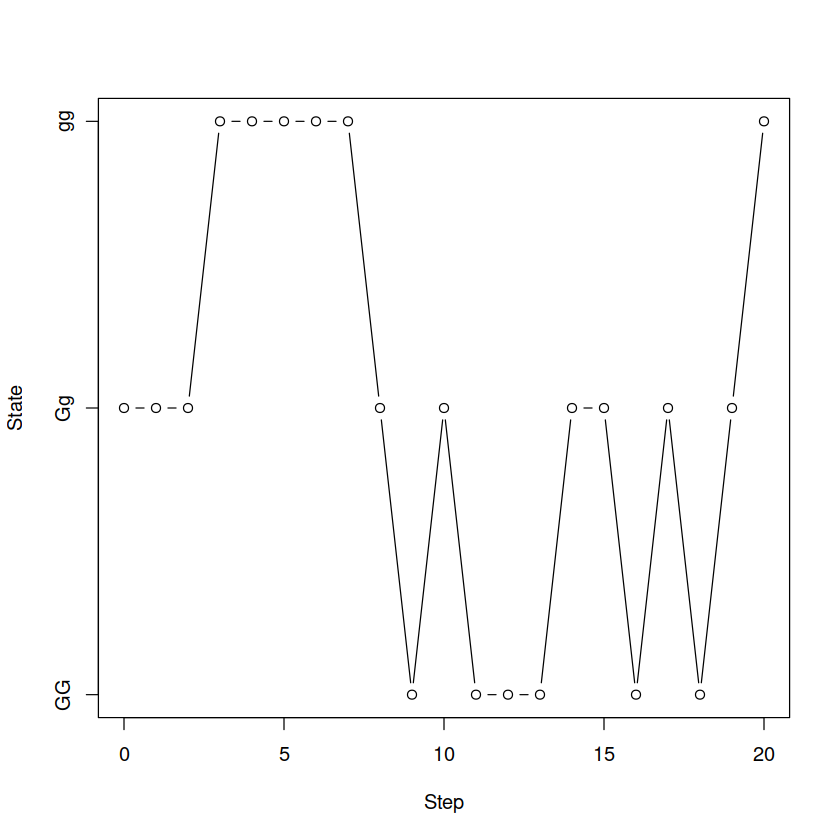

In [96]:
mc = MC(c(0,1,0), P, 20)
v = mc$GG + mc$Gg*2 + mc$gg*3
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State", yaxt = "n")
axis(2, at = c(1,2,3), label = c("GG", "Gg", "gg"))

In [102]:
P = matrix(c(1, 0, 0,
            0.25, 0.5, 0.25,
            0, 1, 0),
          nr = 3, byrow = TRUE)

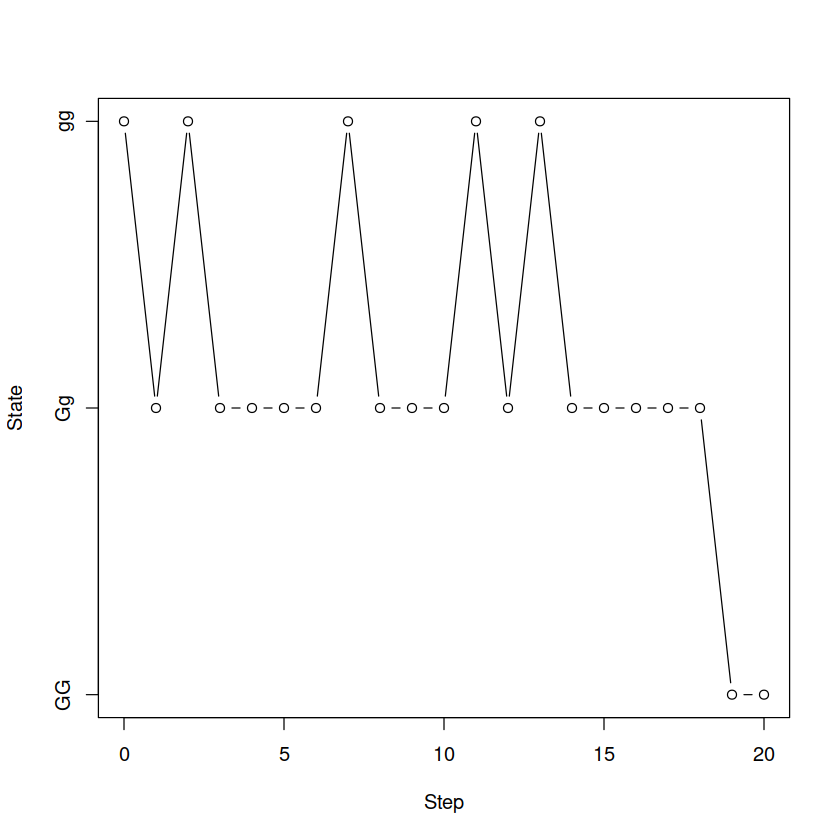

In [104]:
mc = MC(c(0,0,1), P, 20)
v = mc$GG + mc$Gg*2 + mc$gg*3
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State", yaxt = "n")
axis(2, at = c(1,2,3), label = c("GG", "Gg", "gg"))

In [106]:
N = 10
P = mat.or.vec(nr = N, nc = N)
P[1,1] = 1
P[N,N] = 1
for (i in 2:(N-1)) {
    P[i,i] = 0.5
    P[i,(i-1)] = 0.25
    P[i,(i+1)] = 0.25
}
P

1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [123]:
tsteps = 20
p = rep(0, N)
p[5] = 1
mc = MC(p, P, tsteps)
mc
v = rep(0, tsteps)
for (i in 1:N) {
    v = v + i* mc[,(i+1)]
}
#v = mc$GG + mc$Gg*2 + mc$gg*3
#plot(mc$step, v, type = "b", xlab = "Step", ylab = "State", yaxt = "n")
#axis(2, at = c(1,2,3), label = c("GG", "Gg", "gg"))

step,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1,0,0


Warning message in v + i * mc[, (i + 1)]:
“longer object length is not a multiple of shorter object length”


In [121]:
v

[1]  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10 10